---
title: PA 8.2
author: Sujanya Srinath
format:
    html:
        toc: true
        code-fold: true
theme: morph
embed-resources: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [54]:
# Code Here
!pip install palmerpenguins
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [55]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [56]:
penguins = penguins.dropna()
X = penguins.drop('species', axis = 1)
y = penguins['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [57]:
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore"),
         X.select_dtypes(include=['object']).columns),
        ("standardize", StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

KNN - k=3

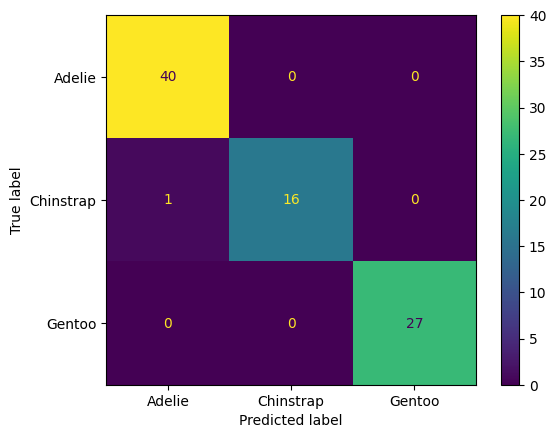

In [58]:
lr_pipeline_knn_3 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors = 3))]
)
lr_pipeline_knn_3_fitted = lr_pipeline_knn_3.fit(X_train, y_train)

y_pred = lr_pipeline_knn_3_fitted.predict(X)
y_pred_test = lr_pipeline_knn_3_fitted.predict(X_test)

#asked chatgpt for syntax of confusion matrix heatmap
ConfusionMatrixDisplay.from_estimator(lr_pipeline_knn_3_fitted, X_test, y_test)

In [59]:
y_pred = cross_val_predict(lr_pipeline_knn_3, X, y, cv=5)
#asked chatgpt for syntax of accuracy score
accuracy_score_knn_3 = accuracy_score(y, y_pred)
print(accuracy_score_knn_3)

0.972972972972973


In [60]:
#asked chatgpt for syntax of report for precision,f1-score and support
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97       146
   Chinstrap       0.92      0.96      0.94        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.97       333
   macro avg       0.96      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333



KNN k=7

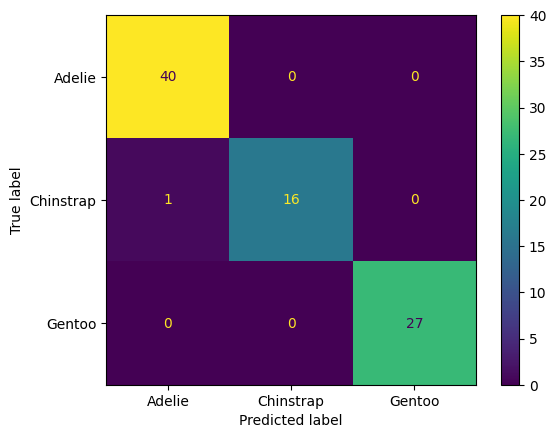

In [61]:
lr_pipeline_knn_7 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors = 7))]
)
lr_pipeline_knn_7_fitted = lr_pipeline_knn_7.fit(X_train, y_train)

y_pred = lr_pipeline_knn_7_fitted.predict(X)
y_pred_test = lr_pipeline_knn_7_fitted.predict(X_test)

ConfusionMatrixDisplay.from_estimator(lr_pipeline_knn_7_fitted, X_test, y_test)

In [62]:
y_pred = cross_val_predict(lr_pipeline_knn_7, X, y, cv=5)
accuracy_score_knn_7 = accuracy_score(y, y_pred)
print(accuracy_score_knn_7)

0.990990990990991


In [63]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



decision tree - depth 5

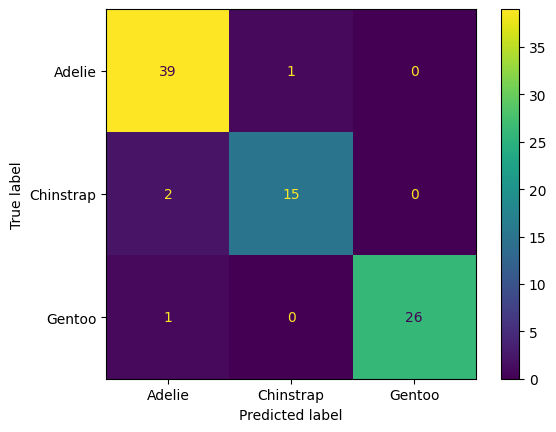

In [64]:
lr_pipeline_5 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeClassifier(max_depth = 5))]
)
lr_pipeline_5_fitted = lr_pipeline_5.fit(X_train, y_train)

y_pred = lr_pipeline_5_fitted.predict(X)
y_pred_test = lr_pipeline_5_fitted.predict(X_test)

ConfusionMatrixDisplay.from_estimator(lr_pipeline_5_fitted, X_test, y_test)

In [65]:
y_pred = cross_val_predict(lr_pipeline_5, X, y, cv=5)
accuracy_score_ds_5 = accuracy_score(y, y_pred)
print(accuracy_score_ds_5)

0.972972972972973


In [66]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97       146
   Chinstrap       0.96      0.97      0.96        68
      Gentoo       0.98      0.99      0.98       119

    accuracy                           0.97       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333



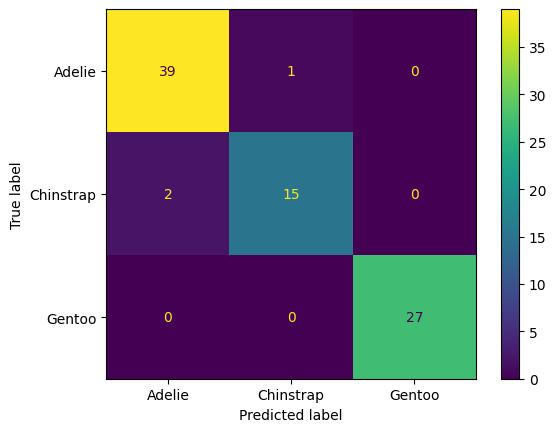

In [67]:
lr_pipeline_10 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeClassifier(max_depth = 10))]
)
lr_pipeline_10_fitted = lr_pipeline_10.fit(X_train, y_train)

y_pred = lr_pipeline_10_fitted.predict(X)
y_pred_test = lr_pipeline_10_fitted.predict(X_test)

ConfusionMatrixDisplay.from_estimator(lr_pipeline_10_fitted, X_test, y_test)

In [68]:
y_pred = cross_val_predict(lr_pipeline_10, X, y, cv=5)
accuracy_score_ds_10 = accuracy_score(y, y_pred)
print(accuracy_score_ds_10)

0.972972972972973


In [69]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97       146
   Chinstrap       0.94      0.96      0.95        68
      Gentoo       0.99      0.99      0.99       119

    accuracy                           0.97       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333



ROC AUC for adelie

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

In [71]:
#asked chatgpt to help with outlining a function to get the roc and auc scores
def calculate_auc_and_roc(pipeline, X, y, model_name, cv=5):
    """
    Calculate the AUC and ROC curve for a given model pipeline.

    Args:
        pipeline: The machine learning pipeline (e.g., KNN, DecisionTree).
        X: The feature set.
        y: The target variable.
        model_name: Name of the model to display in the ROC DataFrame.
        cv: Number of cross-validation folds (default is 5).

    Returns:
        roc_df: A DataFrame containing the model name, FPR, and TPR.
        auc_score: The AUC score for the given model.
    """
    y_pred = cross_val_predict(pipeline, X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc_score = roc_auc_score(y, y_pred)

    roc_df = pd.DataFrame({'Model': model_name, 'FPR': fpr, 'TPR': tpr})
    print(f"The AUC of {model_name} for Adelie is {auc_score:.4f}")

    return roc_df, auc_score


In [72]:
species = (y == 'Adelie')
roc_1, auc_1 = calculate_auc_and_roc(lr_pipeline_knn_3, X, species, "KNN3")
roc_2, auc_2 = calculate_auc_and_roc(lr_pipeline_knn_7, X, species, "KNN7")
roc_3, auc_3 = calculate_auc_and_roc(lr_pipeline_5, X, species, "DecisionTree, depth5")
roc_4, auc_4 = calculate_auc_and_roc(lr_pipeline_10, X, species, "DecisionTree, depth10")




The AUC of KNN3 for Adelie is 0.9786
The AUC of KNN7 for Adelie is 0.9902
The AUC of DecisionTree, depth5 for Adelie is 0.9775
The AUC of DecisionTree, depth10 for Adelie is 0.9676


In [73]:
# Combine all ROC DataFrames for plotting
roc_combined = pd.concat([roc_1, roc_2, roc_3, roc_4], ignore_index=True)

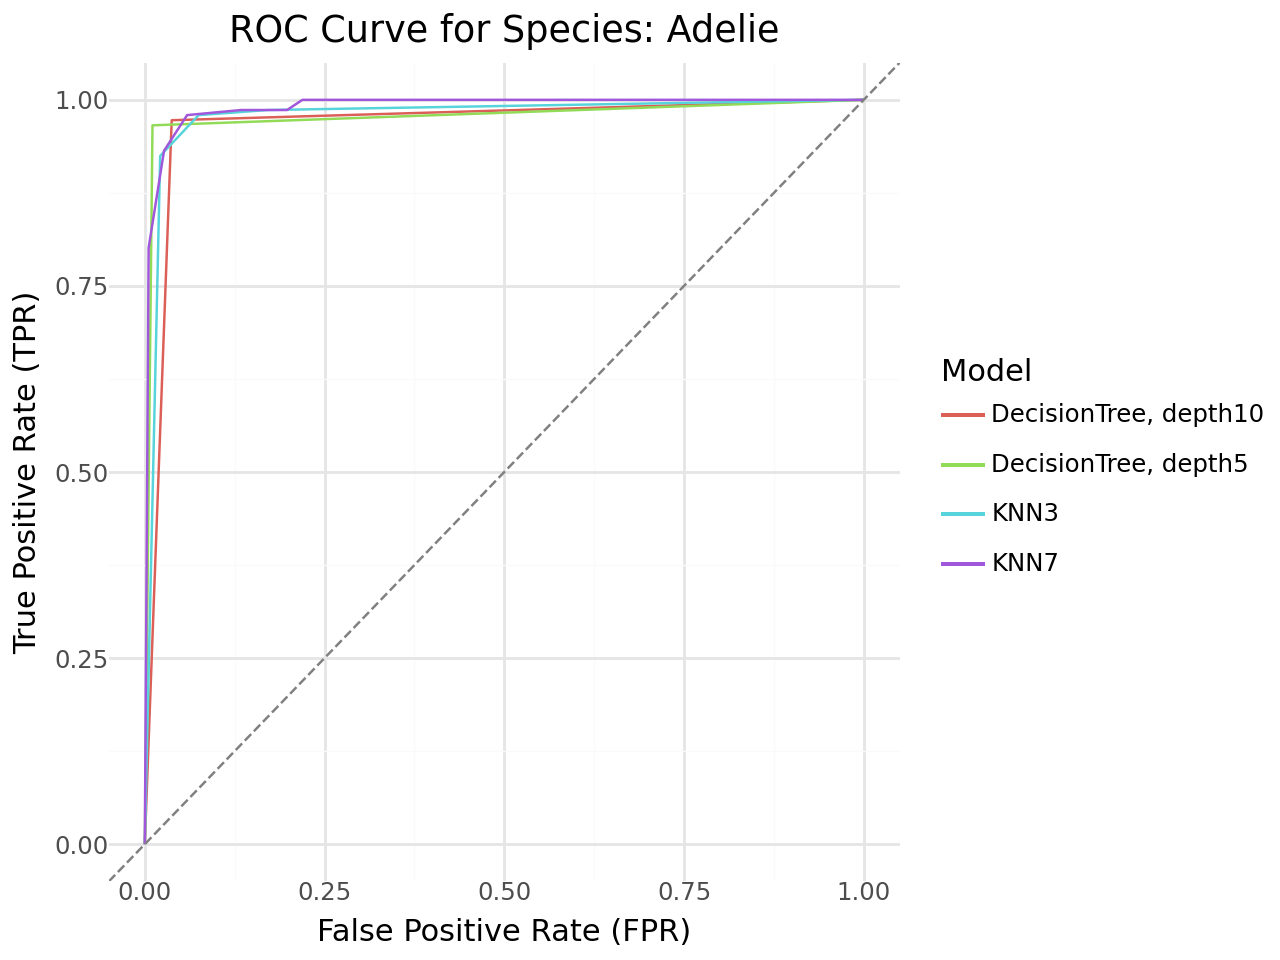

In [74]:
(
    ggplot(roc_combined, aes(x='FPR', y='TPR', color='Model'))
    + geom_line()
    + geom_abline(linetype='dashed', color='gray')  # Diagonal line for random guess
    + labs(
        title="ROC Curve for Species: Adelie",
        x="False Positive Rate (FPR)",
        y="True Positive Rate (TPR)"
    )
    + theme_minimal()
)
